In [2]:
import pandas as pd

# Ruta del archivo CSV
ruta_archivo_excel = '/home/jp/Repositorios/VolumetricAnalysis_MagneticResonance/Data/Demographic_data.csv'

# Carga el archivo
df_demography = pd.read_csv(ruta_archivo_excel)

# Selecciona las primeras 61 filas
df_demography = df_demography[:61]

# Muestra dimensiones
print(f"Dimensiones del DataFrame filtrado: {df_demography.shape}")

# Estilo modo oscuro
styled_df = df_demography.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid #444',
    'color': '#f0f0f0',
    'background-color': '#1e1e1e',
    'padding': '6px'
}).set_table_styles([
    {'selector': 'th', 'props': [
        ('background-color', '#333333'),
        ('color', '#ffffff'),
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('border', '1px solid #555')
    ]},
    {'selector': 'td', 'props': [('border', '1px solid #444')]}
]).set_caption("Tabla Demográfica - Primeras 61 filas").format(na_rep='-')

# Mostrar tabla estilizada
display(styled_df)


Dimensiones del DataFrame filtrado: (61, 7)


,Code,Biomarkers code,Birthdate,Sex,E280A group,MRI1 date,Age at MRI
0,SAN_001,SAN_001,1995-07-26,F,GW,2023-04-14,27.718001
1,SAN_003,SAN_003,1994-04-18,F,GK,2022-12-14,28.657084
2,SAN_004,SAN_004,1990-08-29,M,GW,2023-01-10,32.366872
3,SAN_005,SAN_005,1996-02-01,F,GK,2022-12-07,26.847365
4,SAN_006,SAN_006,1990-07-25,F,GK,2023-01-28,32.511978
5,SAN_008,SAN_008,1992-07-31,F,GW,2023-04-04,30.674880
6,SAN_009,SAN_009,1997-08-16,F,GK,2023-02-02,25.464750
7,SAN_015,SAN_015,1991-11-28,F,GW,2022-12-15,31.047228
8,SAN_021,SAN_021,1995-12-01,M,GW,2023-02-02,27.173169
9,SAN_022,SAN_022,1989-03-16,F,GK,2022-11-11,33.656400


In [2]:
import pandas as pd

# Cambia la ruta al archivo por la ubicación correcta si es necesario
df_area = pd.read_csv('/home/jp/Repositorios/VolumetricAnalysis_MagneticResonance/Data/lh_thickness.txt', sep='\t')

# Opcional: ver las primeras filas para verificar la carga
display(df_area)


,lh.aparc.thickness,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,...,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent,eTIV
0,sub-SAN_001,2.464,2.788,2.347,1.631,3.761,2.574,2.193,2.166,2.408,...,2.010,2.476,2.160,2.189,3.137,2.440,3.282,2.25629,1090732.0,1.010279e+06
1,sub-SAN_003,2.200,2.444,2.248,1.479,3.634,2.516,2.167,2.193,2.293,...,2.026,2.518,2.165,2.357,3.276,2.404,2.679,2.21309,1088990.0,9.928702e+05
2,sub-SAN_004,2.249,2.549,2.395,1.835,3.229,2.566,2.255,2.296,2.392,...,2.110,2.429,2.335,2.764,3.683,2.209,3.181,2.33027,1218335.0,1.137339e+06
3,sub-SAN_005,2.561,3.050,2.617,1.962,3.234,2.808,2.515,2.600,2.486,...,2.260,2.686,2.419,2.973,3.936,2.453,2.869,2.52773,997606.0,1.394186e+06
4,sub-SAN_006,2.347,2.519,2.429,1.681,3.339,2.657,2.327,2.338,2.336,...,2.072,2.626,2.220,2.617,3.943,2.281,3.035,2.31805,1074106.0,1.001934e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,sub-SAN_091,2.322,2.552,2.462,1.673,3.705,2.743,2.293,2.238,2.315,...,2.039,2.675,2.365,2.401,3.591,2.573,3.242,2.31550,990041.0,9.347594e+05
57,sub-SAN_092,1.978,2.560,2.223,1.561,3.423,2.372,2.075,2.321,2.250,...,1.846,2.429,2.026,2.327,3.714,2.073,3.004,2.14473,995584.0,9.294549e+05
58,sub-SAN_093,2.100,2.018,2.251,1.728,3.630,2.683,2.114,2.657,2.271,...,1.953,2.432,2.138,2.320,3.428,2.263,2.749,2.21544,1054842.0,9.870775e+05
59,sub-SAN_094,2.287,2.380,2.379,1.666,3.194,2.803,2.272,2.752,2.757,...,2.071,2.771,2.425,2.396,3.825,2.538,3.082,2.37982,903886.0,8.312529e+05


In [3]:
import pandas as pd

# 1. Carga los archivos
df_demo = pd.read_csv('/home/jp/Repositorios/VolumetricAnalysis_MagneticResonance/Data/Demographic_data.csv')
df_lh = pd.read_csv('/home/jp/Repositorios/VolumetricAnalysis_MagneticResonance/Data/lh.foldind.txt', sep='\t')
df_rh = pd.read_csv('/home/jp/Repositorios/VolumetricAnalysis_MagneticResonance/Data/rh.foldind.txt', sep='\t')

# Renombrar la columna de identificación en los archivos de áreas
df_lh = df_lh.rename(columns={df_lh.columns[0]: 'Biomarkers code'})
df_lh['Biomarkers code'] = df_lh['Biomarkers code'].str.replace('sub-', '', regex=False)

df_rh = df_rh.rename(columns={df_rh.columns[0]: 'Biomarkers code'})
df_rh['Biomarkers code'] = df_rh['Biomarkers code'].str.replace('sub-', '', regex=False)

# --- Solución al problema de duplicados ---
# Si existen tanto 'Code' como 'Biomarkers code' en df_demo, eliminamos 'Code' tras renombrar
if 'Code' in df_demo.columns and 'Biomarkers code' in df_demo.columns:
    df_demo = df_demo.drop(columns=['Code'])

# Si solo existe 'Code', la renombramos
elif 'Code' in df_demo.columns:
    df_demo = df_demo.rename(columns={'Code': 'Biomarkers code'})

# Si solo existe 'Biomarkers code', no hacemos nada

# Nos aseguramos de que solo hay UNA columna 'Biomarkers code'
df_demo = df_demo.loc[:,~df_demo.columns.duplicated()]

# Realiza el primer merge
df_merged = pd.merge(df_demo, df_lh, on='Biomarkers code', how='inner')

# Realiza el segundo merge
df_merged = pd.merge(df_merged, df_rh, on='Biomarkers code', how='inner', suffixes=('_lh', '_rh'))

# Elimina columnas innecesarias (ajusta la lista según lo que desees eliminar)
cols_to_drop = ['BrainSegVolNotVent_lh', 'BrainSegVolNotVent_rh', 'eTIV_lh', 'eTIV_rh']
df_merged = df_merged.drop(columns=[col for col in cols_to_drop if col in df_merged.columns], errors='ignore')

# Lista de columnas a eliminar
cols_to_drop = ['Birthdate', 'Sex', 'MRI1 date', 'Age at MRI']

# Elimina las columnas (si existen)
df_merged = df_merged.drop(columns=cols_to_drop, errors='ignore')

display(df_merged)

,Biomarkers code,E280A group,lh_bankssts_foldind,lh_caudalanteriorcingulate_foldind,lh_caudalmiddlefrontal_foldind,lh_cuneus_foldind,lh_entorhinal_foldind,lh_fusiform_foldind,lh_inferiorparietal_foldind,lh_inferiortemporal_foldind,...,rh_rostralanteriorcingulate_foldind,rh_rostralmiddlefrontal_foldind,rh_superiorfrontal_foldind,rh_superiorparietal_foldind,rh_superiortemporal_foldind,rh_supramarginal_foldind,rh_frontalpole_foldind,rh_temporalpole_foldind,rh_transversetemporal_foldind,rh_insula_foldind
0,SAN_001,GW,5.0,12.0,23.0,29.0,6.0,36.0,60.0,50.0,...,8.0,69.0,74.0,71.0,36.0,39.0,6.0,10.0,6.0,19.0
1,SAN_003,GK,7.0,16.0,22.0,33.0,5.0,48.0,69.0,55.0,...,7.0,90.0,92.0,65.0,39.0,58.0,8.0,9.0,4.0,33.0
2,SAN_004,GW,9.0,26.0,26.0,27.0,4.0,45.0,66.0,56.0,...,6.0,74.0,80.0,71.0,44.0,56.0,9.0,11.0,5.0,22.0
3,SAN_005,GK,9.0,9.0,24.0,25.0,4.0,42.0,64.0,52.0,...,11.0,91.0,72.0,75.0,44.0,51.0,8.0,8.0,4.0,26.0
4,SAN_006,GK,4.0,10.0,28.0,29.0,4.0,42.0,54.0,44.0,...,9.0,88.0,67.0,56.0,37.0,48.0,10.0,6.0,5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,SAN_091,GW,9.0,21.0,20.0,30.0,2.0,38.0,75.0,50.0,...,7.0,86.0,78.0,70.0,33.0,50.0,8.0,8.0,3.0,22.0
57,SAN_092,GW,5.0,12.0,23.0,22.0,9.0,41.0,54.0,46.0,...,5.0,63.0,66.0,67.0,41.0,46.0,6.0,6.0,5.0,21.0
58,SAN_093,GW,5.0,6.0,24.0,20.0,3.0,35.0,54.0,48.0,...,8.0,78.0,67.0,68.0,33.0,51.0,8.0,10.0,4.0,14.0
59,SAN_094,GK,5.0,14.0,18.0,22.0,3.0,34.0,40.0,40.0,...,7.0,61.0,61.0,52.0,26.0,30.0,6.0,6.0,9.0,20.0


In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn y matplotlib instalados:
# !pip install seaborn matplotlib

# Identifica las columnas de regiones cerebrales
# (asumiendo que las primeras columnas son identificadores y grupo)
# Ajusta el índice si tus columnas de regiones empiezan después de la columna 'E280A group'
region_columns = df_merged.columns[1:]  # Si la primera es 'Biomarkers code', y la segunda es 'E280A group'
if 'E280A group' in df_merged.columns:
    region_columns = df_merged.columns[df_merged.columns.get_loc('E280A group')+1:]

# Crea carpetas para guardar los gráficos
os.makedirs("plots/bar", exist_ok=True)
os.makedirs("plots/box", exist_ok=True)
os.makedirs("plots/violin", exist_ok=True)

for region in region_columns:
    plt.figure(figsize=(8,5))
    # Diagrama de barras
    sns.barplot(data=df_merged, x='E280A group', y=region, ci='sd')
    plt.title(f'Diagrama de barras - {region}')
    plt.tight_layout()
    plt.savefig(f"plots/bar/bar_{region}.png")
    plt.close()

    # Caja y bigotes
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_merged, x='E280A group', y=region)
    plt.title(f'Boxplot - {region}')
    plt.tight_layout()
    plt.savefig(f"plots/box/box_{region}.png")
    plt.close()

    # Violin plot
    plt.figure(figsize=(8,5))
    sns.violinplot(data=df_merged, x='E280A group', y=region, inner='box')
    plt.title(f'Violin plot - {region}')
    plt.tight_layout()
    plt.savefig(f"plots/violin/violin_{region}.png")
    plt.close()

/tmp/ipykernel_26809/2557724410.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_merged, x='E280A group', y=region, ci='sd')
/tmp/ipykernel_26809/2557724410.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_merged, x='E280A group', y=region, ci='sd')
/tmp/ipykernel_26809/2557724410.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_merged, x='E280A group', y=region, ci='sd')
/tmp/ipykernel_26809/2557724410.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_merged, x='E280A group', y=region, ci='sd')
/tmp/ipykernel_26809/2557724410.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_merged, x='E280A group', y=region, ci='sd')
/tmp/ipyke

/tmp/ipykernel_26809/1368113947.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


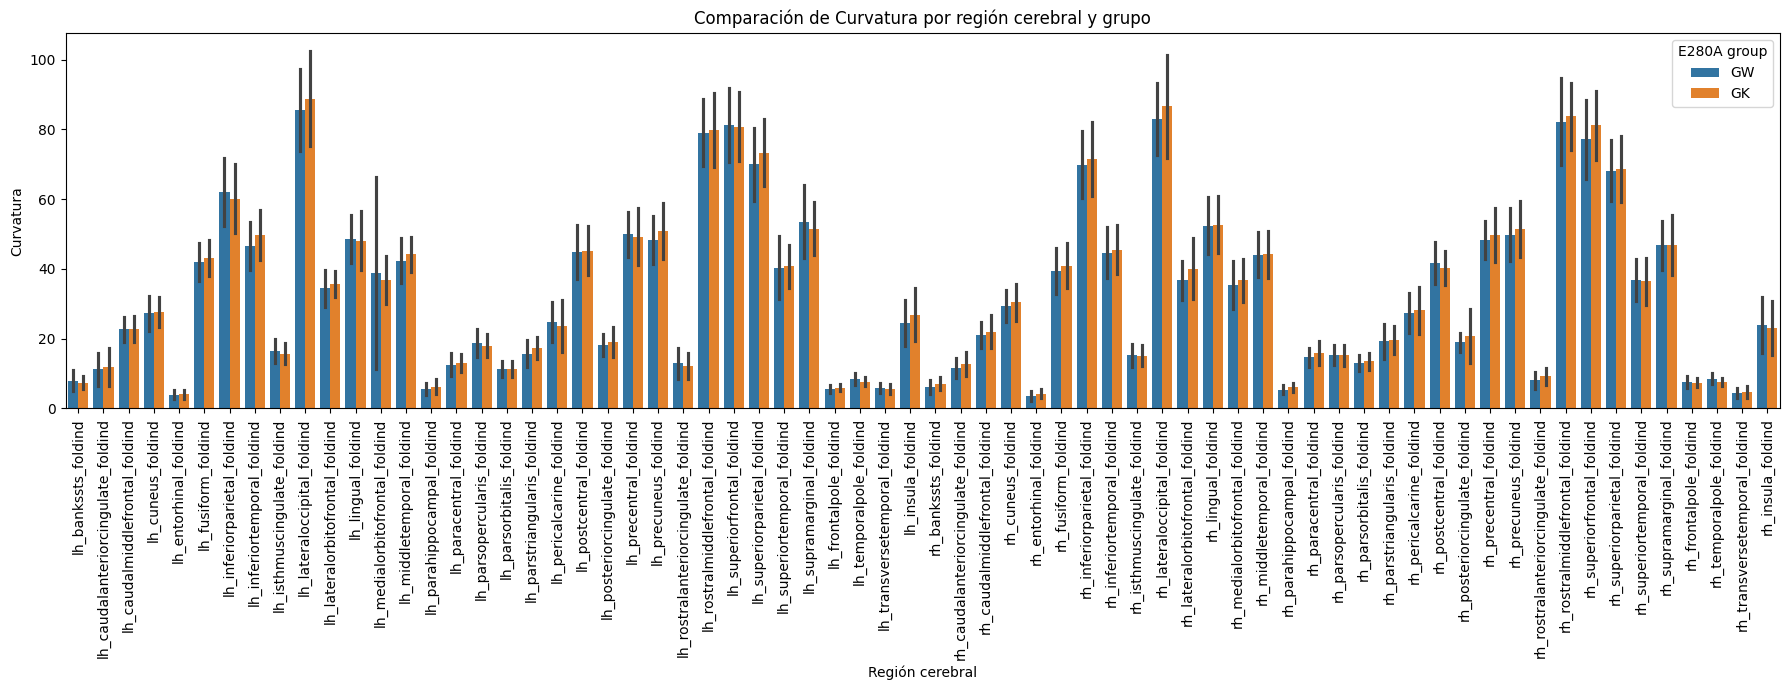

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identifica las columnas de regiones cerebrales
if 'E280A group' in df_merged.columns:
    region_columns = df_merged.columns[df_merged.columns.get_loc('E280A group')+1:]
else:
    # Si no encuentras la columna, ajusta el índice manualmente
    region_columns = df_merged.columns[2:]

# Transforma el DataFrame a formato largo
df_long = pd.melt(
    df_merged,
    id_vars=['Biomarkers code', 'E280A group'],
    value_vars=region_columns,
    var_name='Región cerebral',
    value_name='Curvatura'
)

# Gráfico de barras agrupado por región y grupo
plt.figure(figsize=(18, 7))
sns.barplot(
    data=df_long,
    x='Región cerebral',
    y='Curvatura',
    hue='E280A group',
    ci='sd'
)
plt.xticks(rotation=90)
plt.title('Comparación de Curvatura por región cerebral y grupo')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

region_columns = df_merged.columns[2:]
group_col = 'E280A group'
groups = df_merged[group_col].unique()

results = []

for region in region_columns:
    data1 = df_merged[df_merged[group_col] == groups[0]][region].dropna()
    data2 = df_merged[df_merged[group_col] == groups[1]][region].dropna()
    shapiro_p1 = shapiro(data1).pvalue if len(data1) >= 3 else None
    shapiro_p2 = shapiro(data2).pvalue if len(data2) >= 3 else None
    both_normal = (
        shapiro_p1 is not None and shapiro_p2 is not None and
        shapiro_p1 > 0.05 and shapiro_p2 > 0.05
    )
    if both_normal:
        test = "Welch's t-test"
        stat, p_val = ttest_ind(data1, data2, equal_var=False)
    else:
        test = "Mann-Whitney U"
        if len(data1) >= 3 and len(data2) >= 3:
            stat, p_val = mannwhitneyu(data1, data2, alternative='two-sided')
        else:
            p_val = None
    significant = p_val is not None and p_val < 0.05
    median1 = data1.median() if len(data1) > 0 else None
    median2 = data2.median() if len(data2) > 0 else None
    results.append({
        'Region': region,
        f'Shapiro p ({groups[0]})': shapiro_p1,
        f'Shapiro p ({groups[1]})': shapiro_p2,
        f'Median ({groups[0]})': median1,
        f'Median ({groups[1]})': median2,
        'Test used': test,
        'p-value': p_val,
        'Statistically significant': significant
    })

comparison_table = pd.DataFrame(results)
comparison_table.to_csv("brain_regions_group_comparison.csv", index=False)
print("Table saved as brain_regions_group_comparison.csv")
display(comparison_table)

Table saved as brain_regions_group_comparison.csv


,Region,Shapiro p (GW),Shapiro p (GK),Median (GW),Median (GK),Test used,p-value,Statistically significant
0,lh_bankssts_foldind,0.001833,0.350819,7.5,7.0,Mann-Whitney U,0.689091,False
1,lh_caudalanteriorcingulate_foldind,0.003619,0.000068,10.0,11.0,Mann-Whitney U,0.616425,False
2,lh_caudalmiddlefrontal_foldind,0.202020,0.235519,22.5,23.0,Welch's t-test,0.923173,False
3,lh_cuneus_foldind,0.459035,0.180139,27.0,28.0,Welch's t-test,0.736664,False
4,lh_entorhinal_foldind,0.000054,0.020708,4.0,4.0,Mann-Whitney U,0.439074,False
...,...,...,...,...,...,...,...,...
63,rh_supramarginal_foldind,0.066123,0.854356,45.5,47.0,Welch's t-test,0.965663,False
64,rh_frontalpole_foldind,0.017197,0.137330,7.0,7.0,Mann-Whitney U,0.804524,False
65,rh_temporalpole_foldind,0.079578,0.107476,8.5,8.0,Welch's t-test,0.015458,True
66,rh_transversetemporal_foldind,0.002682,0.050193,4.0,4.0,Mann-Whitney U,0.449594,False


In [7]:
# Assuming you already have 'comparison_table' from your previous code

# Filter only statistically significant regions
significant_table = comparison_table[comparison_table['Statistically significant'] == True].copy()

# Optionally, reset the index for a clean table
significant_table = significant_table.reset_index(drop=True)

# Save to CSV
significant_table.to_csv("brain_regions_significant_comparison.csv", index=False)
print("Table saved as brain_regions_significant_comparison.csv")

# Display the table in the notebook
display(significant_table)

Table saved as brain_regions_significant_comparison.csv


,Region,Shapiro p (GW),Shapiro p (GK),Median (GW),Median (GK),Test used,p-value,Statistically significant
0,lh_frontalpole_foldind,0.000002,0.067460,5.0,6.0,Mann-Whitney U,0.040223,True
1,rh_parahippocampal_foldind,0.000163,0.020676,5.0,6.0,Mann-Whitney U,0.026990,True
2,rh_temporalpole_foldind,0.079578,0.107476,8.5,8.0,Welch's t-test,0.015458,True


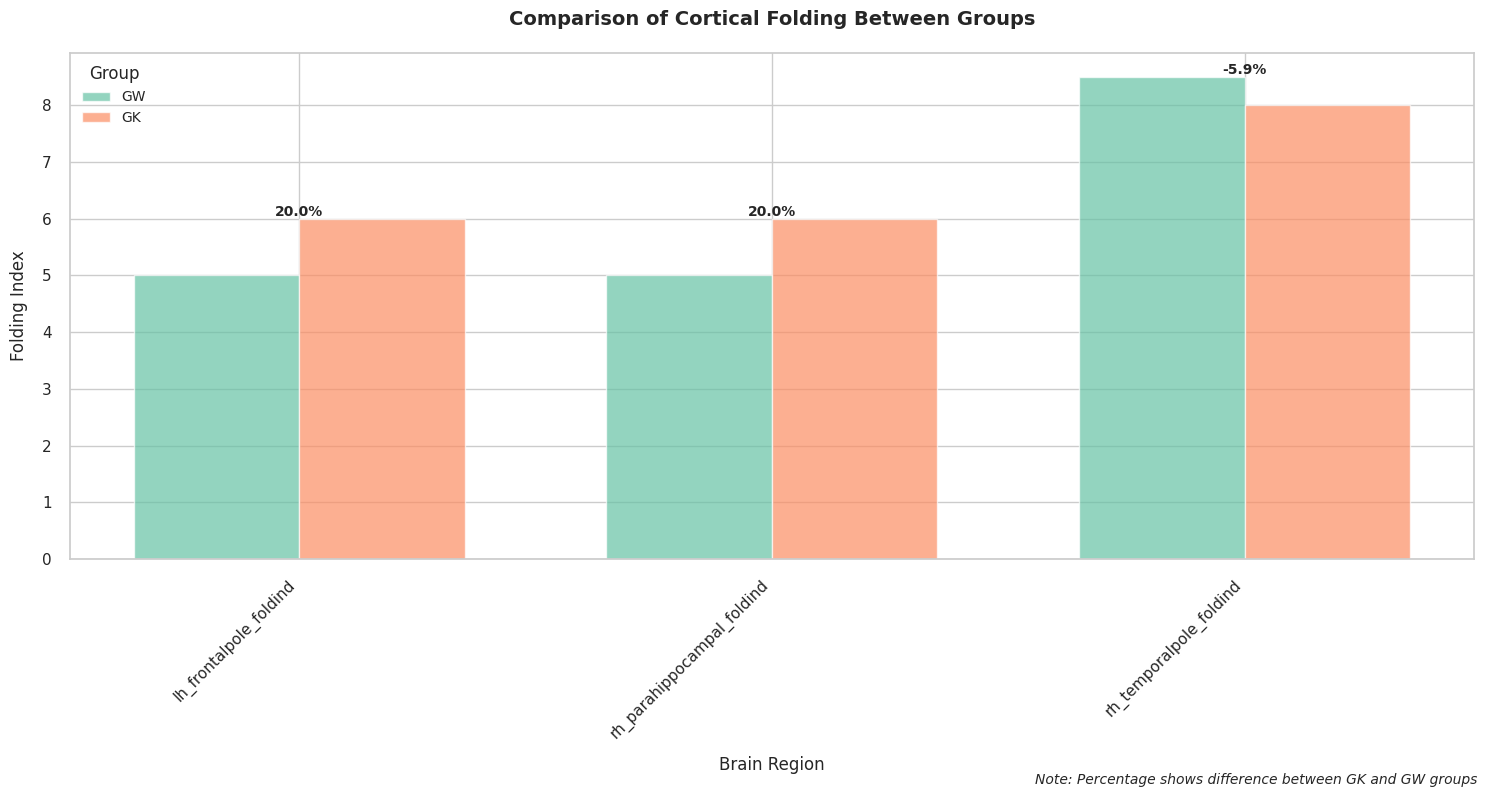

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

# 1. Lista de regiones significativas
significant_regions = comparison_table[comparison_table['Statistically significant'] == True]['Region'].tolist()

if significant_regions:
    # Crear figura
    plt.figure(figsize=(15, 8))

    # Preparar los datos para el gráfico
    x = np.arange(len(significant_regions))
    width = 0.35

    # Crear las barras usando la paleta Set2
    colors = sns.color_palette('Set2')
    
    # Obtener los valores de GW y GK para cada región
    gw_values = [comparison_table[comparison_table['Region'] == region]['Median (GW)'].values[0] for region in significant_regions]
    gk_values = [comparison_table[comparison_table['Region'] == region]['Median (GK)'].values[0] for region in significant_regions]

    plt.bar(x - width/2, gw_values, width, 
            label='GW', color=colors[0], alpha=0.7)
    plt.bar(x + width/2, gk_values, width, 
            label='GK', color=colors[1], alpha=0.7)

    # Calcular y añadir los porcentajes de diferencia
    for i, (gw, gk) in enumerate(zip(gw_values, gk_values)):
        diff_percent = ((gk - gw) / gw) * 100
        plt.text(i, max(gw, gk), f'{diff_percent:.1f}%', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Personalizar el gráfico
    plt.title('Comparison of Cortical Folding Between Groups', 
              pad=20, fontsize=14, fontweight='bold')
    plt.xlabel('Brain Region', fontsize=12, labelpad=10)
    plt.ylabel('Folding Index', fontsize=12, labelpad=10)
    plt.xticks(x, significant_regions, rotation=45, ha='right')
    plt.legend(title='Group', title_fontsize=12, fontsize=10)

    # Ajustar el diseño
    plt.tight_layout()

    # Añadir una nota al pie
    plt.figtext(0.99, 0.01, 
                'Note: Percentage shows difference between GK and GW groups', 
                ha='right', fontsize=10, style='italic')

    plt.show()
else:
    print("No se encontraron regiones con diferencias significativas (p < 0.01).")